KMeans Silhouette Score: 0.46761358158775435
KMeans Davies-Bouldin Index: 0.7152768202484618


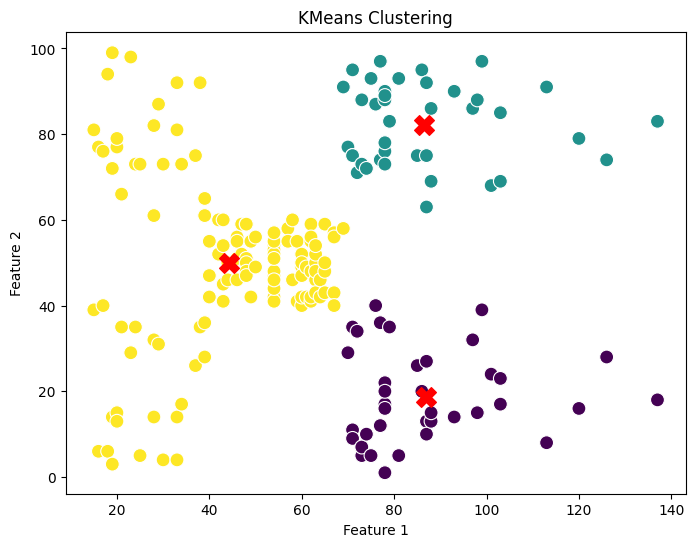

KModes Silhouette Score: -0.27951535885213963
KModes Davies-Bouldin Index: 3.8345220198672756


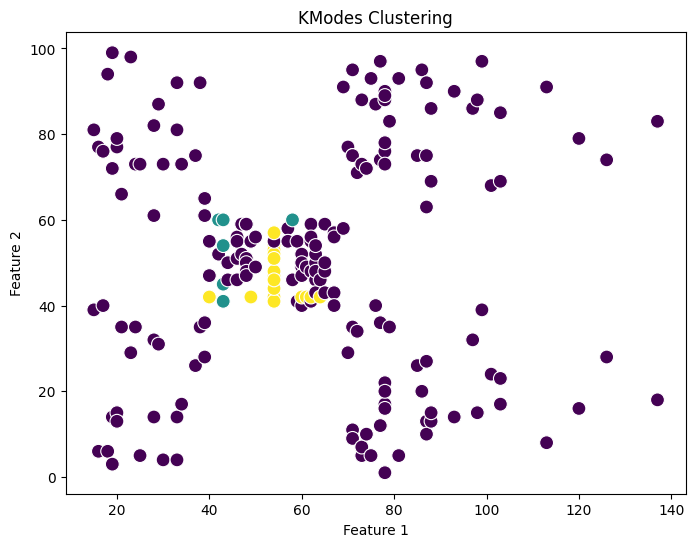

Gaussian Mixture Silhouette Score: 0.4310103691306562
Gaussian Mixture Davies-Bouldin Index: 0.7039397900724359


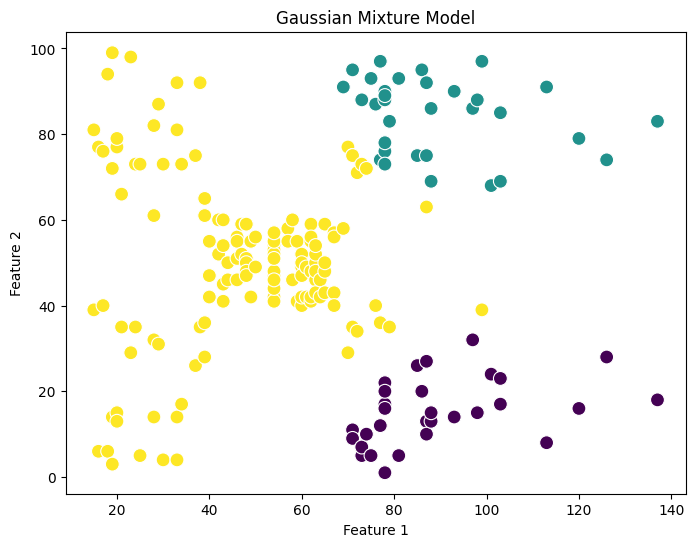

DBSCAN Silhouette Score: 0.1135163893571667
DBSCAN Davies-Bouldin Index: 2.5520714073233335


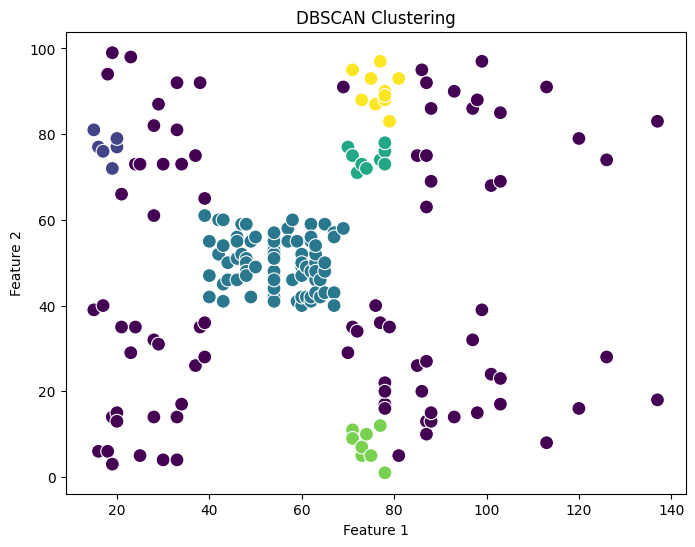

Ward Linkage Silhouette Score: 0.4618340266628975
Ward Linkage Davies-Bouldin Index: 0.7068435076376502


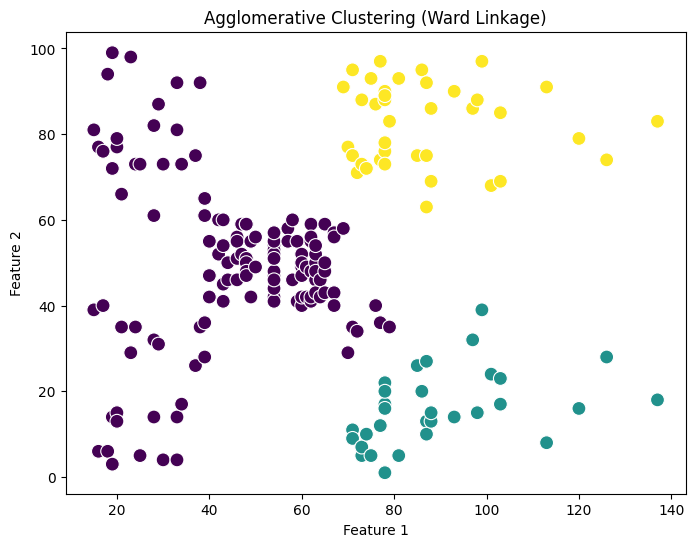

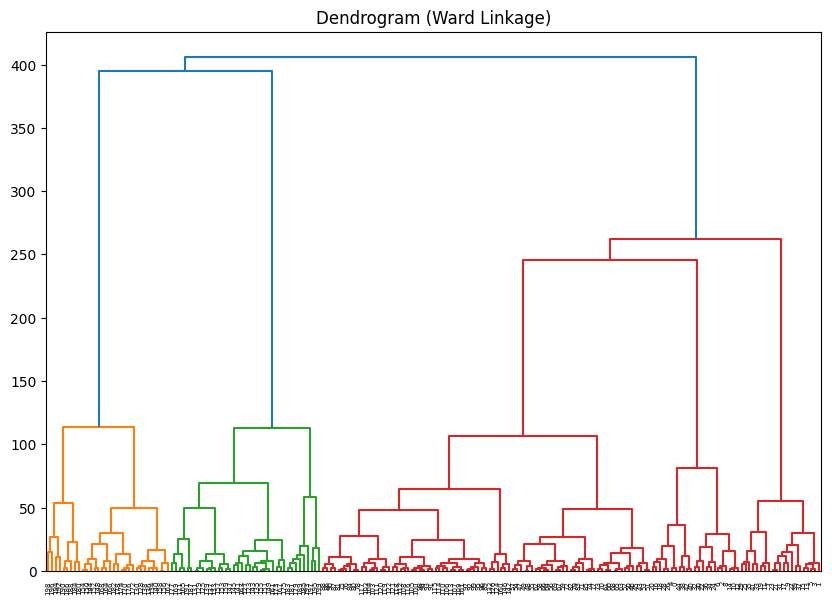

Complete Linkage Silhouette Score: 0.4618340266628975
Complete Linkage Davies-Bouldin Index: 0.7068435076376502


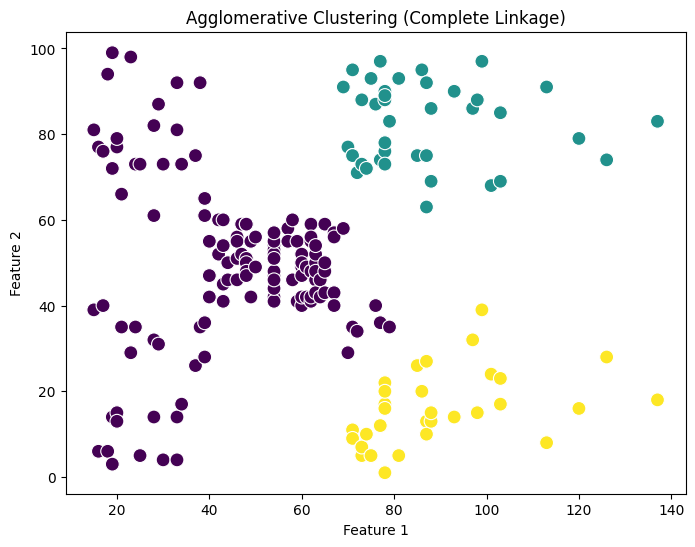

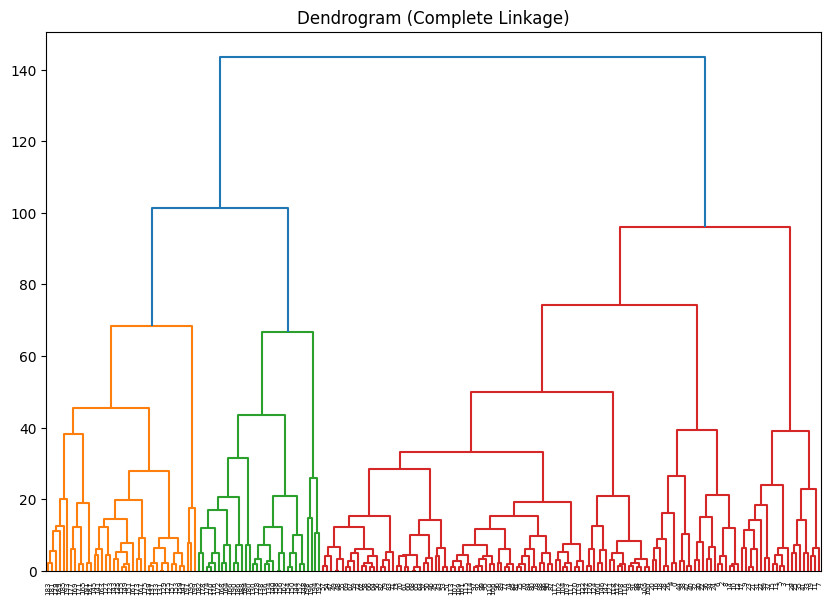

Average Linkage Silhouette Score: 0.46761358158775435
Average Linkage Davies-Bouldin Index: 0.7152768202484618


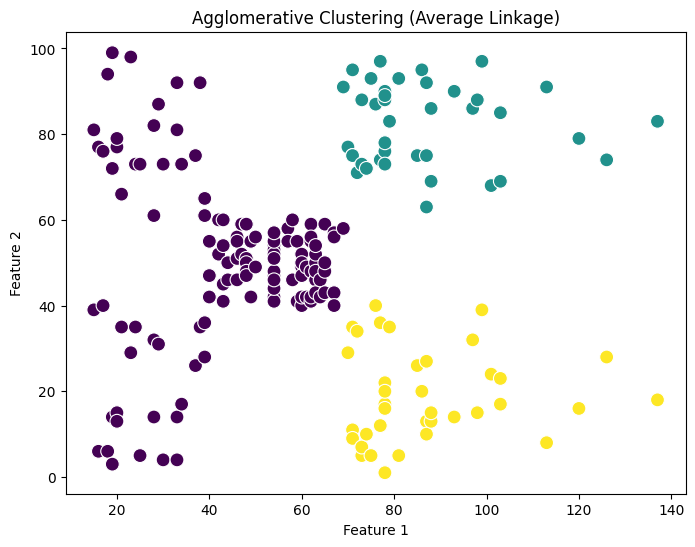

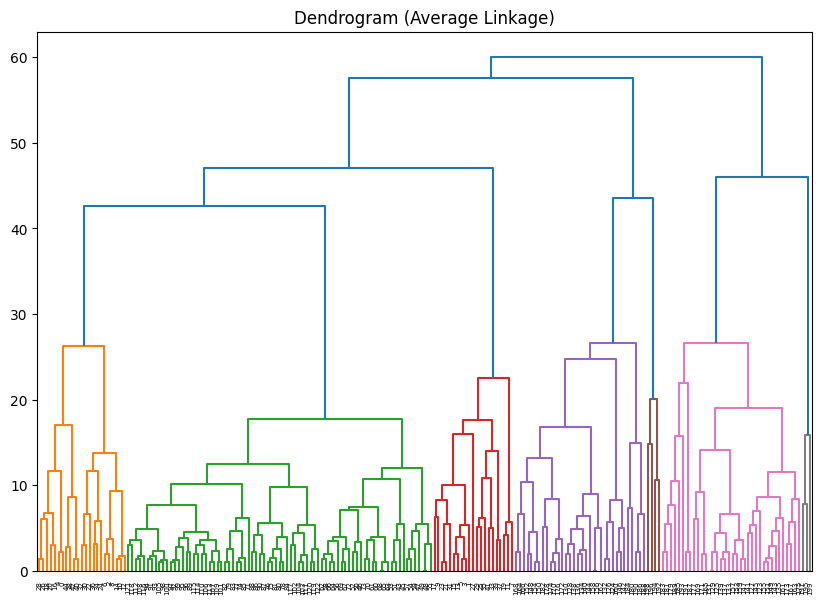

Single Linkage Silhouette Score: 0.365677402459876
Single Linkage Davies-Bouldin Index: 0.36466169396889353


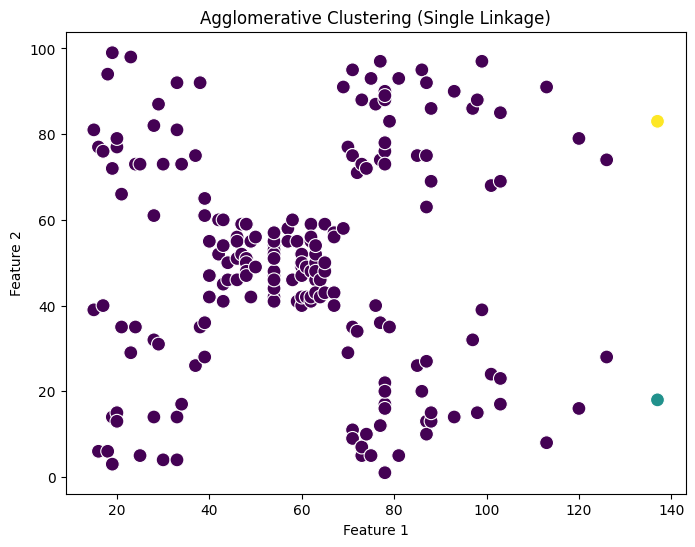

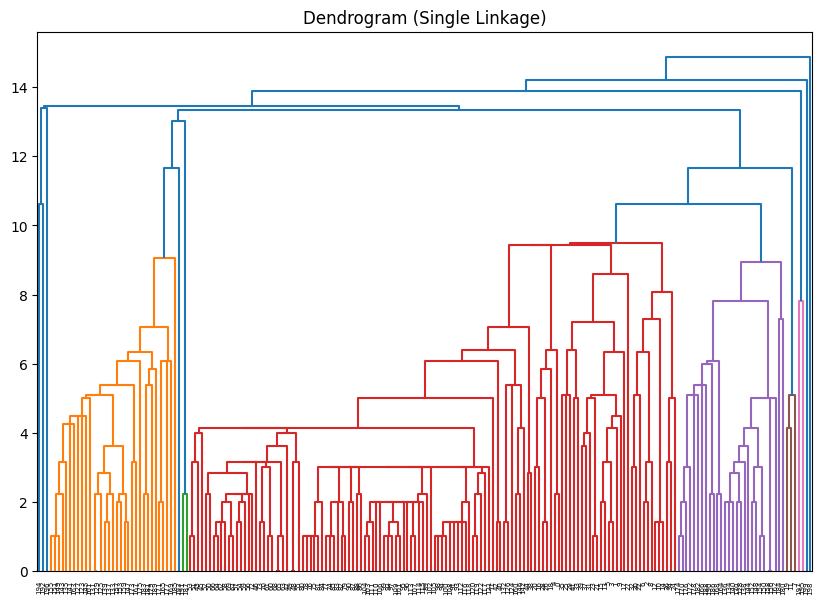

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv("Mall_Customers.csv")
data = data.dropna()

# Select relevant features
X = data.iloc[:, [3, 4]].values  # Assuming Annual Income and Spending Score

#Visualization
def visualize_clusters(X, labels, centers=None, title="Clustering Results"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", s=100, legend=None)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_centers = kmeans.cluster_centers_
print("KMeans Silhouette Score:", silhouette_score(X, kmeans_labels))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))
visualize_clusters(X, kmeans_labels, centers=kmeans_centers, title="KMeans Clustering")

# KModes
kmodes = KModes(n_clusters=3, init="Huang", random_state=42)
kmodes_labels = kmodes.fit_predict(X)
print("KModes Silhouette Score:", silhouette_score(X, kmodes_labels))
print("KModes Davies-Bouldin Index:", davies_bouldin_score(X, kmodes_labels))
visualize_clusters(X, kmodes_labels, title="KModes Clustering")

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
print("Gaussian Mixture Silhouette Score:", silhouette_score(X, gmm_labels))
print("Gaussian Mixture Davies-Bouldin Index:", davies_bouldin_score(X, gmm_labels))
visualize_clusters(X, gmm_labels, title="Gaussian Mixture Model")

# DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
print("DBSCAN Silhouette Score:", silhouette_score(X, dbscan_labels))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(X, dbscan_labels))
visualize_clusters(X, dbscan_labels, title="DBSCAN Clustering")

# Agglomerative Clustering with all linkage methods
linkage_methods = ["ward", "complete", "average", "single"]
for method in linkage_methods:
    agglo = AgglomerativeClustering(n_clusters=3, linkage=method)
    agglo_labels = agglo.fit_predict(X)
    print(f"{method.capitalize()} Linkage Silhouette Score:", silhouette_score(X, agglo_labels))
    print(f"{method.capitalize()} Linkage Davies-Bouldin Index:", davies_bouldin_score(X, agglo_labels))
    visualize_clusters(X, agglo_labels, title=f"Agglomerative Clustering ({method.capitalize()} Linkage)")

    # Dendrogram
    plt.figure(figsize=(10, 7))
    linked = linkage(X, method=method)
    dendrogram(linked, orientation="top", labels=None, distance_sort="descending", show_leaf_counts=False)
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    plt.show()
